In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import datetime
import pandas as pd
import numpy as np

from pprint import pprint

with open('./data/Chrome/BrowserHistory.json') as data_file:    
    data = json.load(data_file)

chrome_df = pd.DataFrame(data["Browser History"])
chrome_df.head()

,client_id,favicon_url,page_transition,time_usec,title,url
0,F3C75XhUAIfrT3nvBz5vIQ==,https://www.expedia.com/favicon.ico,LINK,1480194801825151,"West Wind Inn (Sanibel, United States of Ameri...",https://www.expedia.com/Fort-Myers-Hotels-West...
1,F3C75XhUAIfrT3nvBz5vIQ==,https://www.google.com/favicon.ico,LINK,1480193699968093,Data tools - Download your data,https://takeout.google.com/settings/takeout
2,F3C75XhUAIfrT3nvBz5vIQ==,https://www.google.com/images/branding/product...,GENERATED,1480193697076810,google takeout - Google Search,https://www.google.com/webhp?sourceid=chrome-i...
3,F3C75XhUAIfrT3nvBz5vIQ==,https://www.google.com/favicon.ico,LINK,1480193685823082,Data tools - Download your data,https://takeout.google.com/settings/takeout
4,F3C75XhUAIfrT3nvBz5vIQ==,https://www.google.com/images/branding/product...,GENERATED,1480193682844871,google takeout - Google Search,https://www.google.com/webhp?sourceid=chrome-i...


In [2]:
### Make these dates usable

In [3]:
def get_month_day_hour(timestamp):
    date = datetime.date.fromtimestamp(timestamp)

    return (date.strftime('%b'), date.strftime('%a'), date.strftime('%-H'))

chrome_df['timestamp'] = (chrome_df['time_usec']/1000000).astype(int) # in microseconds
chrome_df['month'], chrome_df['day_of_week'], chrome_df['hour'] = zip(*chrome_df["timestamp"].map(get_month_day_hour))

In [4]:
### Filter urls

In [11]:
chrome_df['site'] = chrome_df['url'].str.extract('\.(\w+)(?:\.com|\.org|\.net|\.co)')

In [6]:
### Plot some data
chrome_df.head()

,client_id,favicon_url,page_transition,time_usec,title,url,timestamp,month,day_of_week,hour,site
0,F3C75XhUAIfrT3nvBz5vIQ==,https://www.expedia.com/favicon.ico,LINK,1480194801825151,"West Wind Inn (Sanibel, United States of Ameri...",https://www.expedia.com/Fort-Myers-Hotels-West...,1480194801,Nov,Sat,0,expedia
1,F3C75XhUAIfrT3nvBz5vIQ==,https://www.google.com/favicon.ico,LINK,1480193699968093,Data tools - Download your data,https://takeout.google.com/settings/takeout,1480193699,Nov,Sat,0,google
2,F3C75XhUAIfrT3nvBz5vIQ==,https://www.google.com/images/branding/product...,GENERATED,1480193697076810,google takeout - Google Search,https://www.google.com/webhp?sourceid=chrome-i...,1480193697,Nov,Sat,0,google
3,F3C75XhUAIfrT3nvBz5vIQ==,https://www.google.com/favicon.ico,LINK,1480193685823082,Data tools - Download your data,https://takeout.google.com/settings/takeout,1480193685,Nov,Sat,0,google
4,F3C75XhUAIfrT3nvBz5vIQ==,https://www.google.com/images/branding/product...,GENERATED,1480193682844871,google takeout - Google Search,https://www.google.com/webhp?sourceid=chrome-i...,1480193682,Nov,Sat,0,google


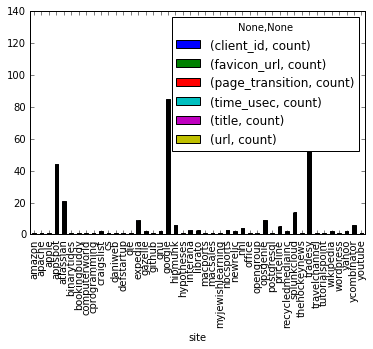

In [33]:
chrome_df.head(500).groupby("site").agg(['count']).plot(kind="bar")